In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.optimize import leastsq
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

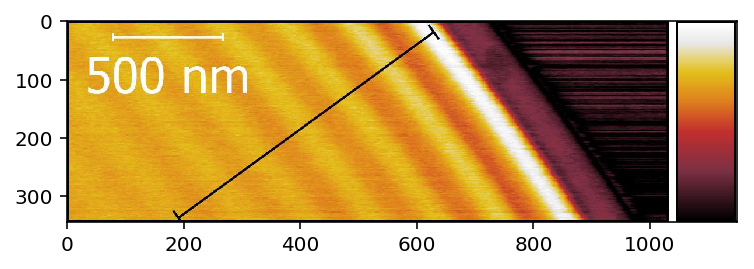

In [2]:
# Let's see the experimental data
plt.imshow(mpimg.imread('exp_image.jpg'));

In [3]:
# Load the profile
df = pd.read_csv('data.csv',names=['x', 'y'])

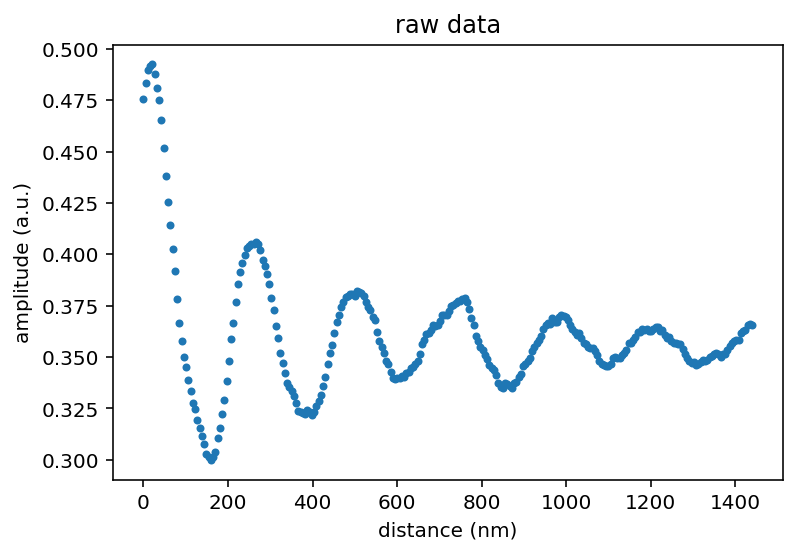

In [4]:
plt.plot(df.x, df.y, '.')
plt.title('raw data')
plt.xlabel('distance (nm)')
plt.ylabel('amplitude (a.u.)')
plt.show()

In [5]:
# Let's make a first guess:
z0 = [0.1, 2*np.pi/200, 0, 0.001, df.y.mean()]

In [6]:
# Let's plot our first guess
guess = z0[0]*np.sin(z0[1]*df.x+z0[2])*np.exp(-z0[3]*df.x) + z0[4]

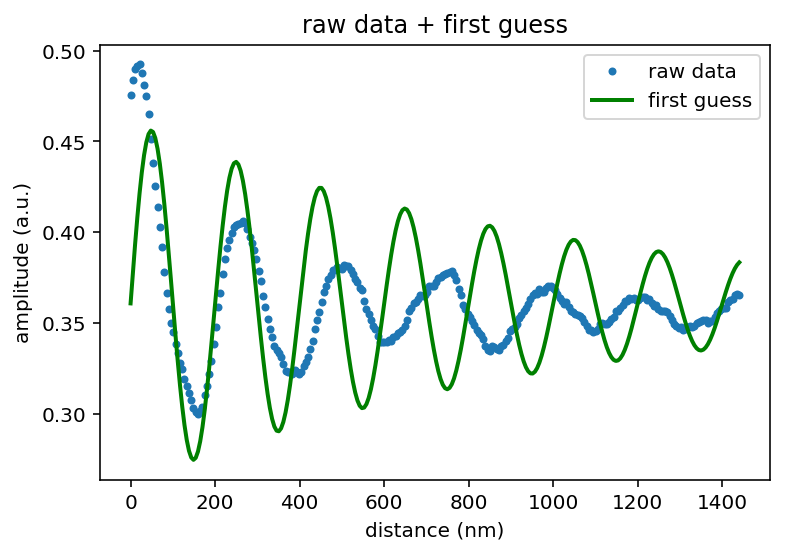

In [7]:
plt.plot(df.x, df.y, '.', label='raw data')
plt.plot(df.x, guess, label='first guess', c='green', linewidth=2.0)
plt.title('raw data + first guess')
plt.xlabel('distance (nm)')
plt.ylabel('amplitude (a.u.)')
plt.legend()
plt.show()

In [8]:
# Error funtion is the difference between the initial guess and the actual data  
func = lambda z: z[0]*np.sin(z[1]*df.x+z[2])*np.exp(-z[3]*df.x) + z[4] - df.y

In [9]:
z = leastsq(func, [z0])[0]

In [10]:
# Now let's fit it
fit = z[0]*np.sin(z[1]*df.x+z[2])*np.exp(-z[3]*df.x) + z[4]

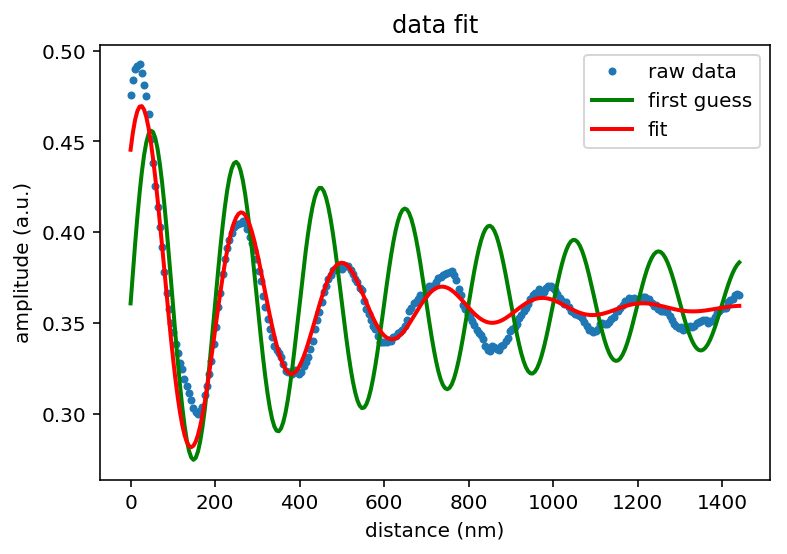

In [11]:
# Let's see what we get:
plt.plot(df.x, df.y, '.', label='raw data')
plt.plot(df.x, guess, label='first guess', c='green',linewidth=2.0)
plt.plot(df.x, fit, label='fit', c='red',linewidth=2.0)
plt.title('data fit')
plt.xlabel('distance (nm)')
plt.ylabel('amplitude (a.u.)')
plt.legend()
plt.show()

In [12]:
# Print the fitted parameters
result = pd.DataFrame(z.reshape(1,5), columns = ['amplitude', 'momentum', 'phase', 'decay_const', 'dc_signal'])
result

,amplitude,momentum,phase,decay_const,dc_signal
0,0.121129,0.026463,0.803146,0.00315,0.358288
